# Parkinson's Disease Prediction - Group 5

## Loading the Dataset, Data Preprocessing and Data Summarisation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/19CSE304_FDS/parkinsons.data")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.head())
df.shape

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0  phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1  phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2  phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3  phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4  phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335

[5 rows x 24 columns]


(195, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
df.groupby('status').count()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...  spread2   D2  PPE
status                                   ...                   
0         48           48            48  ...       48   48   48
1        147          147           147  ...      147  147  147

[2 rows x 23 columns]

In [ ]:
# check whether the column has any value other than numeric values
df.iloc[:,1:][~df.iloc[:,1:].applymap(np.isreal).all(1)]

Empty DataFrame
Columns: [MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, status, RPDE, DFA, spread1, spread2, D2, PPE]
Index: []

In [ ]:
#Dropping column 'name' because it has no relevance
df.drop(['name'], axis = 1,inplace = True)

In [ ]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...          D2         PPE
count   195.000000    195.000000  ...  195.000000  195.000000
mean    154.228641    197.104918  ...    2.381826    0.206552
std      41.390065     91.491548  ...    0.382799    0.090119
min      88.333000    102.145000  ...    1.423287    0.044539
25%     117.572000    134.862500  ...    2.099125    0.137451
50%     148.790000    175.829000  ...    2.361532    0.194052
75%     182.769000    224.205500  ...    2.636456    0.252980
max     260.105000    592.030000  ...    3.671155    0.527367

[8 rows x 23 columns]

In [ ]:
#dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe
df.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...        D2       PPE
MDVP:Fo(Hz)          1.000000      0.400985  ...  0.177980 -0.372356
MDVP:Fhi(Hz)         0.400985      1.000000  ...  0.176323 -0.069543
MDVP:Flo(Hz)         0.596546      0.084951  ... -0.100629 -0.340071
MDVP:Jitter(%)      -0.118003      0.102086  ...  0.433434  0.721543
MDVP:Jitter(Abs)    -0.382027     -0.029198  ...  0.310694  0.748162
MDVP:RAP            -0.076194      0.097177  ...  0.426605  0.670999
MDVP:PPQ            -0.112165      0.091126  ...  0.412524  0.769647
Jitter:DDP          -0.076213      0.097150  ...  0.426556  0.671005
MDVP:Shimmer        -0.098374      0.002281  ...  0.507088  0.693771
MDVP:Shimmer(dB)    -0.073742      0.043465  ...  0.512233  0.695058
Shimmer:APQ3        -0.094717     -0.003743  ...  0.467265  0.645377
Shimmer:APQ5        -0.070682     -0.009997  ...  0.502174  0.702456
MDVP:APQ            -0.077774      0.004937  ...  0.536869  0.721694
Shimmer:DDA         -0.094732     -0.003733  ...  0.467261  0.645389
NHR                 -0.021981      0.163766  ...  0.470949  0.552591
HNR                  0.059144     -0.024893  ... -0.601401 -0.692876
status              -0.383535     -0.166136  ...  0.340232  0.531039
RPDE                -0.383894     -0.112404  ...  0.236931  0.545886
DFA                 -0.446013     -0.343097  ... -0.165381  0.270445
spread1             -0.413738     -0.076658  ...  0.495123  0.962435
spread2             -0.249450     -0.002954  ...  0.523532  0.644711
D2                   0.177980      0.176323  ...  1.000000  0.480585
PPE                 -0.372356     -0.069543  ...  0.480585  1.000000

[23 rows x 23 columns]

In [ ]:
#First quartile
df.quantile(0.25)

MDVP:Fo(Hz)         117.572000
MDVP:Fhi(Hz)        134.862500
MDVP:Flo(Hz)         84.291000
MDVP:Jitter(%)        0.003460
MDVP:Jitter(Abs)      0.000020
MDVP:RAP              0.001660
MDVP:PPQ              0.001860
Jitter:DDP            0.004985
MDVP:Shimmer          0.016505
MDVP:Shimmer(dB)      0.148500
Shimmer:APQ3          0.008245
Shimmer:APQ5          0.009580
MDVP:APQ              0.013080
Shimmer:DDA           0.024735
NHR                   0.005925
HNR                  19.198000
status                1.000000
RPDE                  0.421306
DFA                   0.674758
spread1              -6.450096
spread2               0.174351
D2                    2.099125
PPE                   0.137451
Name: 0.25, dtype: float64

In [ ]:
#Second Quartile / Median
df.quantile(0.5)

MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
status                1.000000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
Name: 0.5, dtype: float64

In [ ]:
#Third Quartile
df.quantile(0.75)

MDVP:Fo(Hz)         182.769000
MDVP:Fhi(Hz)        224.205500
MDVP:Flo(Hz)        140.018500
MDVP:Jitter(%)        0.007365
MDVP:Jitter(Abs)      0.000060
MDVP:RAP              0.003835
MDVP:PPQ              0.003955
Jitter:DDP            0.011505
MDVP:Shimmer          0.037885
MDVP:Shimmer(dB)      0.350000
Shimmer:APQ3          0.020265
Shimmer:APQ5          0.022380
MDVP:APQ              0.029400
Shimmer:DDA           0.060795
NHR                   0.025640
HNR                  25.075500
status                1.000000
RPDE                  0.587562
DFA                   0.761881
spread1              -5.046192
spread2               0.279234
D2                    2.636456
PPE                   0.252980
Name: 0.75, dtype: float64

In [ ]:
# Interquartile range
df.quantile(0.75) - df.quantile(0.25)

MDVP:Fo(Hz)         65.197000
MDVP:Fhi(Hz)        89.343000
MDVP:Flo(Hz)        55.727500
MDVP:Jitter(%)       0.003905
MDVP:Jitter(Abs)     0.000040
MDVP:RAP             0.002175
MDVP:PPQ             0.002095
Jitter:DDP           0.006520
MDVP:Shimmer         0.021380
MDVP:Shimmer(dB)     0.201500
Shimmer:APQ3         0.012020
Shimmer:APQ5         0.012800
MDVP:APQ             0.016320
Shimmer:DDA          0.036060
NHR                  0.019715
HNR                  5.877500
status               0.000000
RPDE                 0.166256
DFA                  0.087124
spread1              1.403904
spread2              0.104883
D2                   0.537330
PPE                  0.115529
dtype: float64

In [ ]:
# Getting the 60th percentile for each column

pd.Series(np.percentile(df, 60, axis = 0), index = df.columns)

MDVP:Fo(Hz)         156.821800
MDVP:Fhi(Hz)        200.411400
MDVP:Flo(Hz)        109.553400
MDVP:Jitter(%)        0.005468
MDVP:Jitter(Abs)      0.000040
MDVP:RAP              0.002910
MDVP:PPQ              0.003154
Jitter:DDP            0.008730
MDVP:Shimmer          0.027514
MDVP:Shimmer(dB)      0.255400
Shimmer:APQ3          0.014624
Shimmer:APQ5          0.016154
MDVP:APQ              0.021052
Shimmer:DDA           0.043882
NHR                   0.017256
HNR                  23.291400
status                1.000000
RPDE                  0.538285
DFA                   0.733997
spread1              -5.490110
spread2               0.241625
D2                    2.445560
PPE                   0.220530
dtype: float64

In [ ]:
df.kurtosis(numeric_only  = True)

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

Kurtosis with positive values indicates that those attributes have more data points around the tail

In [ ]:
df.skew(numeric_only  = True)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

Skewness with positive values indicates data is skewed towards right. Skewness with negative values indicates data is skewed towards left

## Data Visualization

In [ ]:
import seaborn as sns

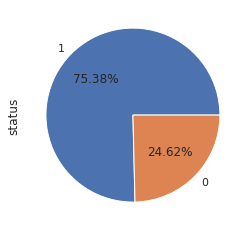

In [ ]:
df['status'].value_counts().plot(kind='pie', autopct = "%1.2f%%")

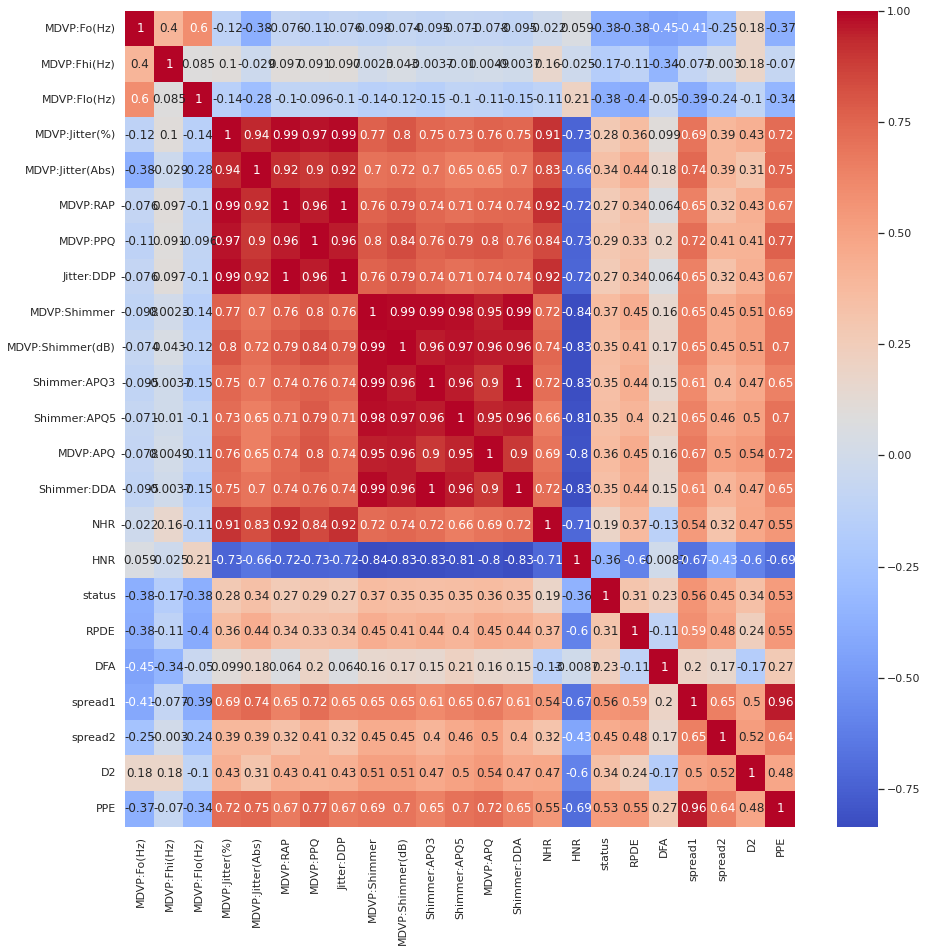

In [ ]:
# points which are red indicate positive linear correlation between the features - the value 1 indicating perfect positive linear correlation
# points which are blue indicate negative linear correlation between the features - the value -1 indicating perfect negative linear correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, cmap= "coolwarm")

**Average vocal fundamental frequency MDVP:Fo(Hz)**

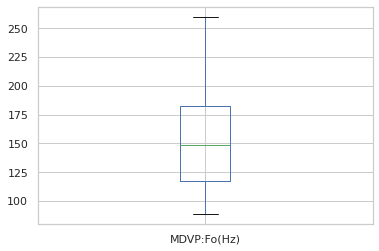

In [ ]:
df['MDVP:Fo(Hz)'].plot(kind='box')

Skewness :  0.5917374636540784
Kurtosis :  -0.6278981066788805
AxesSubplot(0.125,0.125;0.775x0.755)


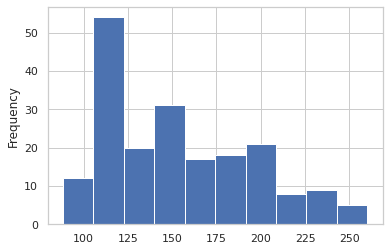

In [ ]:
print('Skewness : ',df['MDVP:Fo(Hz)'].skew())
print('Kurtosis : ',df['MDVP:Fo(Hz)'].kurtosis())
print(df['MDVP:Fo(Hz)'].plot.hist())

The value is positive hence the data is skewed towards right side

The value is negative hence less data points are around the tail

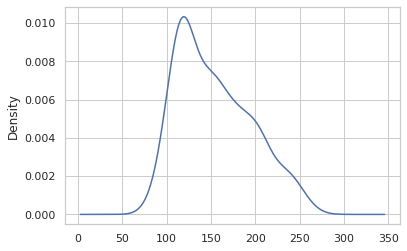

In [ ]:
df['MDVP:Fo(Hz)'].plot.kde()

In [ ]:
diseased_freq_avg = df[df["status"] == 1]["MDVP:Fo(Hz)"].values
healthy_freq_avg = df[df["status"] == 0]["MDVP:Fo(Hz)"].values


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


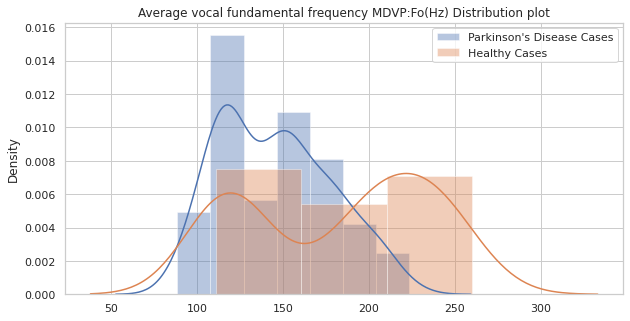

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_freq_avg, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_freq_avg, hist=True, label="Healthy Cases")
plt.title("Average vocal fundamental frequency MDVP:Fo(Hz) Distribution plot")
plt.legend()
plt.show()

Maximum vocal fundamental frequency MDVP:Fhi(Hz)

In [ ]:
diseased_freq_max = df[df["status"] == 1]["MDVP:Fhi(Hz)"].values
healthy_freq_max = df[df["status"] == 0]["MDVP:Fhi(Hz)"].values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


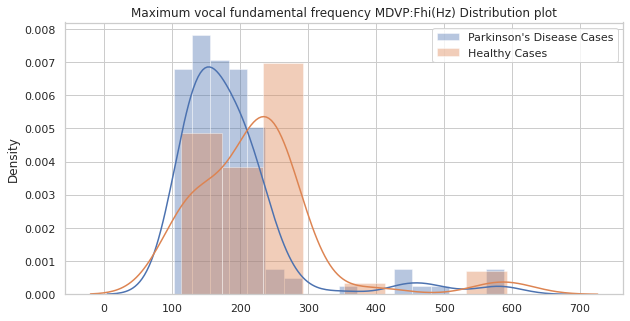

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_freq_max, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_freq_max, hist=True, label="Healthy Cases")
plt.title("Maximum vocal fundamental frequency MDVP:Fhi(Hz) Distribution plot")
plt.legend()
plt.show()

MDVP:Jitter(%)

In [ ]:
diseased_jitter_perc = df[df["status"] == 1]["MDVP:Jitter(%)"].values
healthy_jitter_perc = df[df["status"] == 0]["MDVP:Jitter(%)"].values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


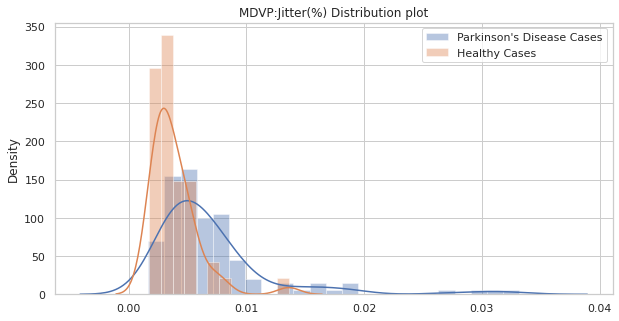

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_jitter_perc, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_jitter_perc, hist=True, label="Healthy Cases")
plt.title("MDVP:Jitter(%) Distribution plot")
plt.legend()
plt.show()


MDVP:Jitter(Abs)

In [ ]:
diseased_jitter_abs = df[df["status"] == 1]["MDVP:Jitter(Abs)"].values
healthy_jitter_abs = df[df["status"] == 0]["MDVP:Jitter(Abs)"].values


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


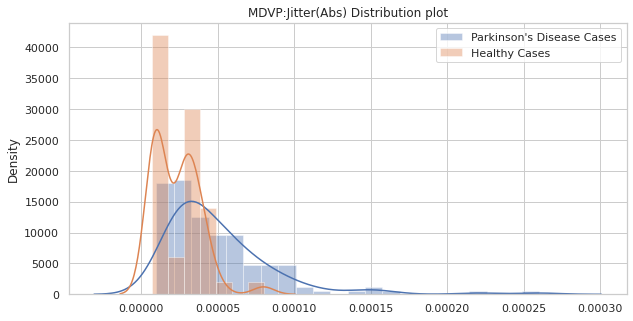

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_jitter_abs, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_jitter_abs, hist=True, label="Healthy Cases")
plt.title("MDVP:Jitter(Abs) Distribution plot")
plt.legend()
plt.show()

MDVP:RAP

In [ ]:
diseased_rap = df[df["status"] == 1]["MDVP:RAP"].values
healthy_rap = df[df["status"] == 0]["MDVP:RAP"].values


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


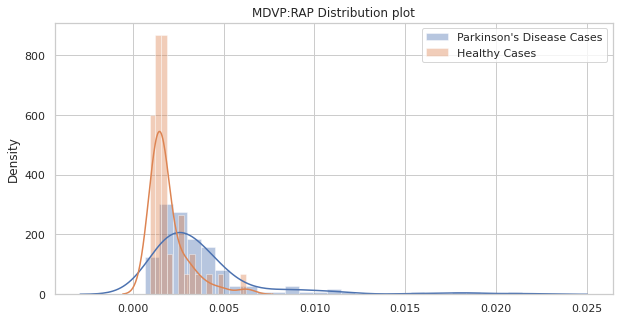

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_rap, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_rap, hist=True, label="Healthy Cases")
plt.title("MDVP:RAP Distribution plot")
plt.legend()
plt.show()


MDVP:PPQ

In [ ]:
diseased_ppq =df[df["status"] == 1]["MDVP:PPQ"].values
healthy_ppq = df[df["status"] == 0]["MDVP:PPQ"].values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


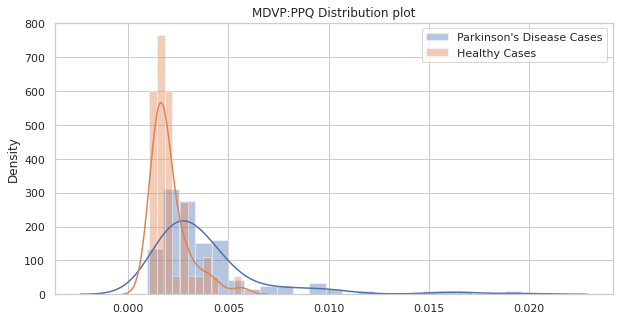

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_ppq, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_ppq, hist=True, label="Healthy Cases")
plt.title("MDVP:PPQ Distribution plot")
plt.legend()
plt.show()

Jitter:DDP

In [ ]:
diseased_jitter_ddp = df[df["status"] == 1]["Jitter:DDP"].values
healthy_jitter_ddp = df[df["status"] == 0]["Jitter:DDP"].values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


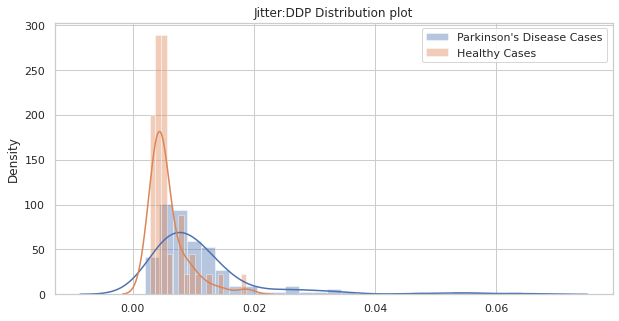

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(diseased_jitter_ddp, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_jitter_ddp, hist=True, label="Healthy Cases")
plt.title("Jitter:DDP Distribution plot")
plt.legend()
plt.show()

MDVP:Flo(Hz)

In [ ]:
diseased_flo = df[df["status"] == 1]["MDVP:Flo(Hz)"].values
healthy_flo = df[df["status"] == 0]["MDVP:Flo(Hz)"].values

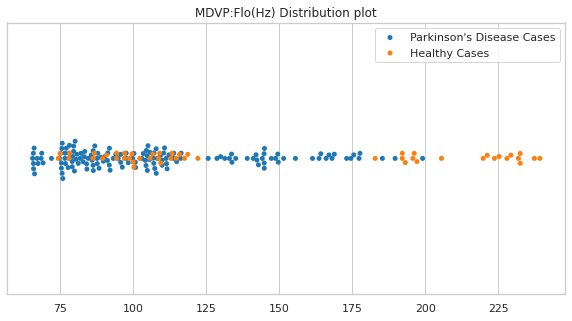

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.swarmplot(x=diseased_flo, label="Parkinson's Disease Cases",color="tab:blue")
sns.swarmplot(x=healthy_flo,  label="Healthy Cases",color="tab:orange")
plt.title("MDVP:Flo(Hz) Distribution plot")
plt.legend()
plt.show()

MDVP:Shimmer

In [ ]:
diseased_shimmer = df[df["status"] == 1]["MDVP:Shimmer"].values
healthy_shimmer = df[df["status"] == 0]["MDVP:Shimmer"].values

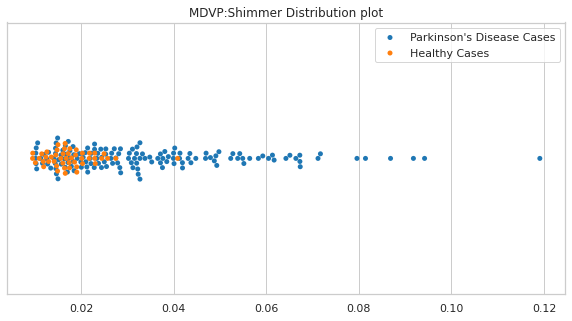

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.swarmplot(x=diseased_shimmer, label="Parkinson's Disease Cases",color="tab:blue")
sns.swarmplot(x=healthy_shimmer,  label="Healthy Cases",color="tab:orange")
plt.title("MDVP:Shimmer Distribution plot")
plt.legend()
plt.show()

MDVP:Shimmer(dB)

In [ ]:
diseased_shimmer_db = df[df["status"] == 1]["MDVP:Shimmer(dB)"].values
healthy_shimmer_db = df[df["status"] == 0]["MDVP:Shimmer(dB)"].values

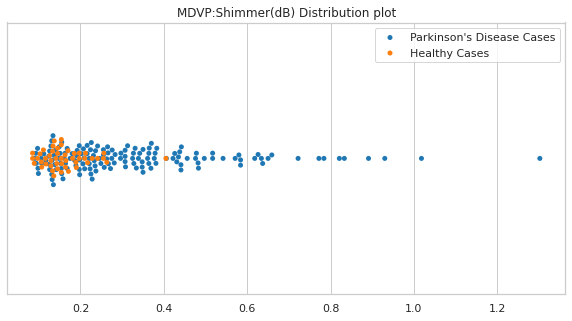

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.swarmplot(x=diseased_shimmer_db, label="Parkinson's Disease Cases",color="tab:blue")
sns.swarmplot(x=healthy_shimmer_db,  label="Healthy Cases",color="tab:orange")
plt.title("MDVP:Shimmer(dB) Distribution plot")
plt.legend()
plt.show()

Shimmer:APQ3

In [ ]:
diseased_shimmer_apq3 = df[df["status"] == 1]["Shimmer:APQ3"].values
healthy_shimmer_apq3 = df[df["status"] == 0]["Shimmer:APQ3"].values

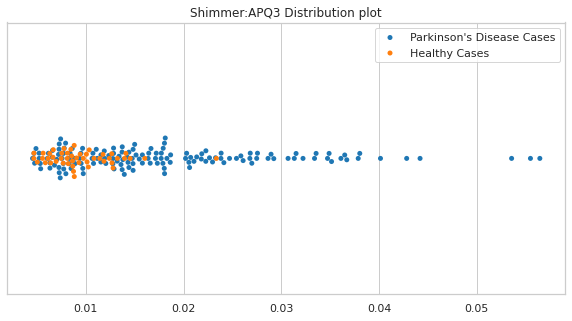

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.swarmplot(x=diseased_shimmer_apq3, label="Parkinson's Disease Cases",color="tab:blue")
sns.swarmplot(x=healthy_shimmer_apq3,  label="Healthy Cases",color="tab:orange")
plt.title("Shimmer:APQ3 Distribution plot")
plt.legend()
plt.show()

Shimmer:APQ5

In [ ]:
diseased_shimmer_apq5 = df[df["status"] == 1]["Shimmer:APQ5"].values
healthy_shimmer_apq5 = df[df["status"] == 0]["Shimmer:APQ5"].values

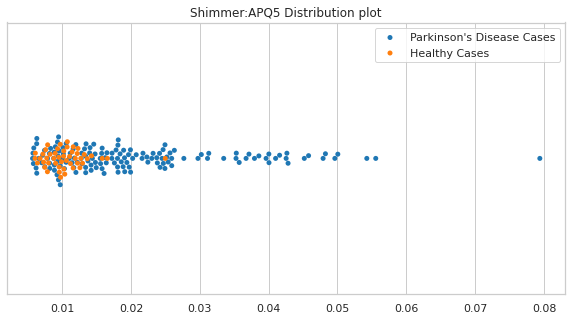

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.swarmplot(x=diseased_shimmer_apq5, label="Parkinson's Disease Cases",color="tab:blue")
sns.swarmplot(x=healthy_shimmer_apq5,  label="Healthy Cases",color="tab:orange")
plt.title("Shimmer:APQ5 Distribution plot")
plt.legend()
plt.show()

MDVP:APQ

In [ ]:
diseased_mdvp_apq = df[df["status"] == 1]["MDVP:APQ"].values
healthy_mdvp_apq = df[df["status"] == 0]["MDVP:APQ"].values

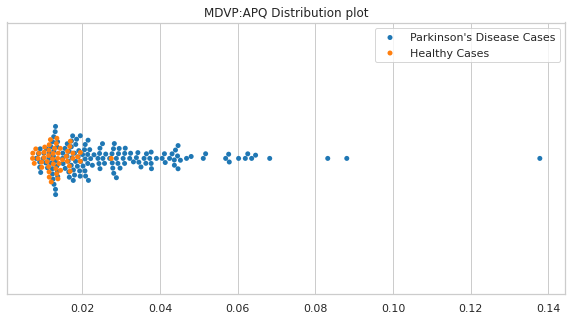

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.swarmplot(x=diseased_mdvp_apq, label="Parkinson's Disease Cases",color="tab:blue")
sns.swarmplot(x=healthy_mdvp_apq,  label="Healthy Cases",color="tab:orange")
plt.title("MDVP:APQ Distribution plot")
plt.legend()
plt.show()

Shimmer:DDA

In [ ]:
diseased_shimmer_dda = df[df["status"] == 1]["Shimmer:DDA"].values
healthy_shimmer_dda = df[df["status"] == 0]["Shimmer:DDA"].values

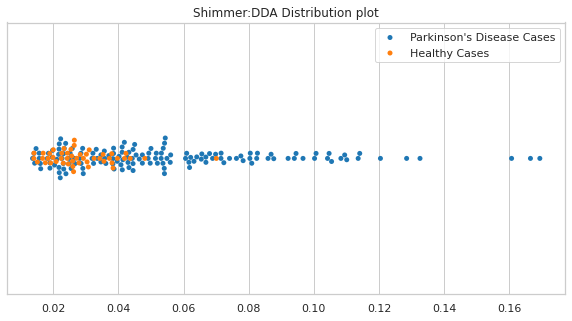

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.swarmplot(x=diseased_shimmer_dda, label="Parkinson's Disease Cases",color="tab:blue")
sns.swarmplot(x=healthy_shimmer_dda,  label="Healthy Cases",color="tab:orange")
plt.title("Shimmer:DDA Distribution plot")
plt.legend()
plt.show()

NHR

In [ ]:
diseased_nhr = df[df["status"] == 1]["NHR"].values
healthy_nhr = df[df["status"] == 0]["NHR"].values

No handles with labels found to put in legend.


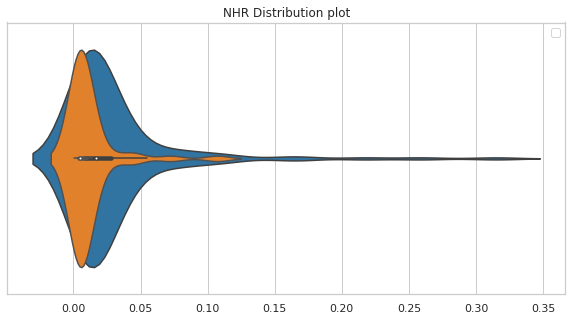

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x=diseased_nhr, label="Parkinson's Disease Cases",color="tab:blue")
sns.violinplot(x=healthy_nhr,  label="Healthy Cases",color="tab:orange")
plt.title("NHR Distribution plot")
plt.legend()
plt.show()

HNR

In [ ]:
diseased_hnr = df[df["status"] == 1]["HNR"].values
healthy_hnr = df[df["status"] == 0]["HNR"].values

No handles with labels found to put in legend.


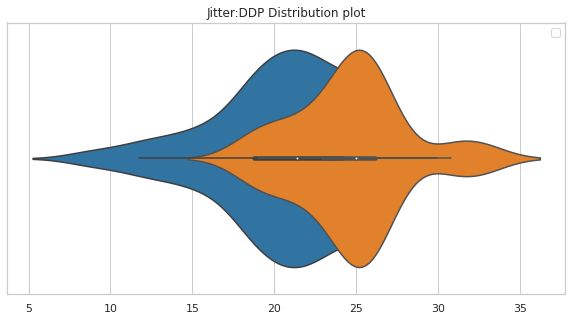

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x=diseased_hnr, label="Parkinson's Disease Cases",color="tab:blue")
sns.violinplot(x=healthy_hnr,  label="Healthy Cases",color="tab:orange")
plt.title("Jitter:DDP Distribution plot")
plt.legend()
plt.show()

RPDE

In [ ]:
diseased_RPDE = df[df["status"] == 1]["RPDE"].values
healthy_RPDE = df[df["status"] == 0]["RPDE"].values

No handles with labels found to put in legend.


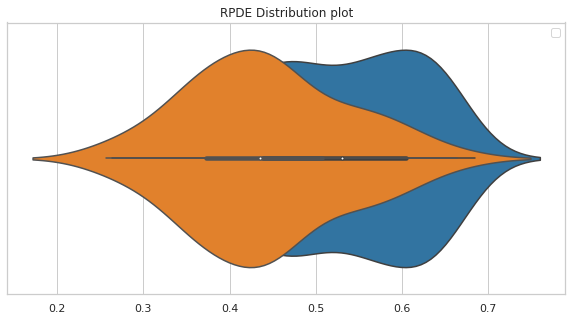

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x=diseased_RPDE, label="Parkinson's Disease Cases",color="tab:blue")
sns.violinplot(x=healthy_RPDE,  label="Healthy Cases",color="tab:orange")
plt.title("RPDE Distribution plot")
plt.legend()
plt.show()

DFA

In [ ]:
diseased_DFA = df[df["status"] == 1]["DFA"].values
healthy_DFA = df[df["status"] == 0]["DFA"].values

No handles with labels found to put in legend.


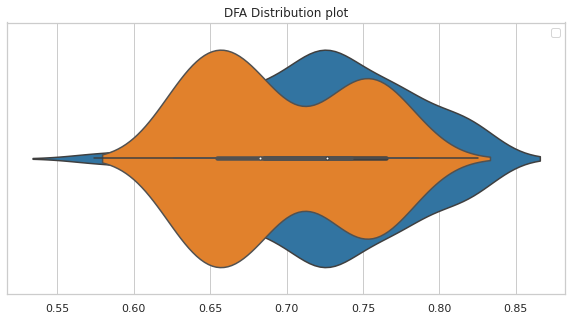

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x=diseased_DFA, label="Parkinson's Disease Cases",color="tab:blue")
sns.violinplot(x=healthy_DFA,  label="Healthy Cases",color="tab:orange")
plt.title("DFA Distribution plot")
plt.legend()
plt.show()

spread1

In [ ]:
diseased_spread1 = df[df["status"] == 1]["spread1"].values
healthy_spread1 = df[df["status"] == 0]["spread1"].values

No handles with labels found to put in legend.


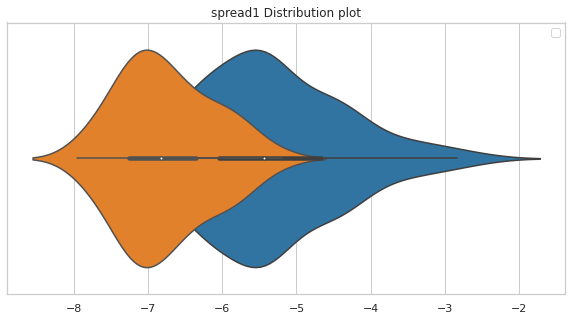

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x=diseased_spread1, label="Parkinson's Disease Cases",color="tab:blue")
sns.violinplot(x=healthy_spread1,  label="Healthy Cases",color="tab:orange")
plt.title("spread1 Distribution plot")
plt.legend()
plt.show()

spread2

In [ ]:
diseased_spread2 = df[df["status"] == 1]["spread2"].values
healthy_spread2 = df[df["status"] == 0]["spread2"].values

No handles with labels found to put in legend.


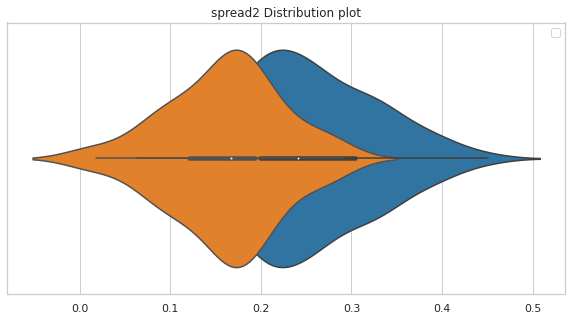

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x=diseased_spread2, label="Parkinson's Disease Cases",color="tab:blue")
sns.violinplot(x=healthy_spread2,  label="Healthy Cases",color="tab:orange")
plt.title("spread2 Distribution plot")
plt.legend()
plt.show()

D2

In [ ]:
diseased_D2 = df[df["status"] == 1]["D2"].values
healthy_D2 = df[df["status"] == 0]["D2"].values

No handles with labels found to put in legend.


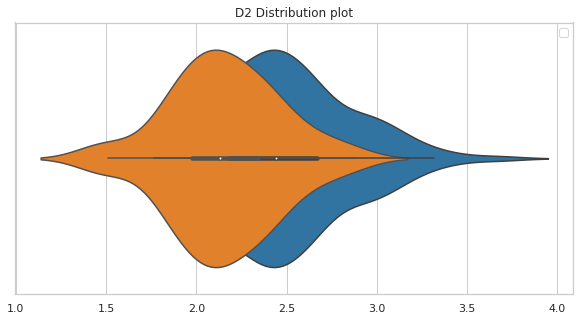

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x=diseased_D2, label="Parkinson's Disease Cases",color="tab:blue")
sns.violinplot(x=healthy_D2,  label="Healthy Cases",color="tab:orange")
plt.title("D2 Distribution plot")
plt.legend()
plt.show()

PPE

In [ ]:
diseased_PPE = df[df["status"] == 1]["PPE"].values
healthy_PPE = df[df["status"] == 0]["PPE"].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


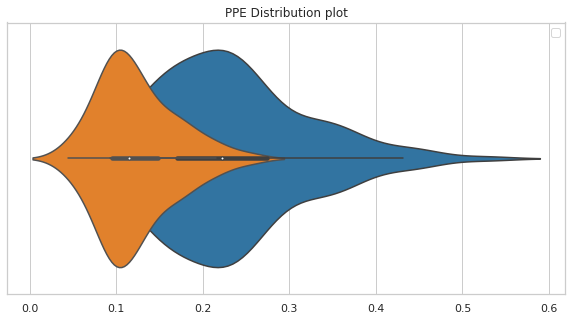

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(diseased_PPE, label="Parkinson's Disease Cases",color="tab:blue")
sns.violinplot(healthy_PPE,  label="Healthy Cases",color="tab:orange")
plt.title("PPE Distribution plot")
plt.legend()
plt.show()

We have bar plots and histograms next up to give us visual representation of the features - we can see the distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


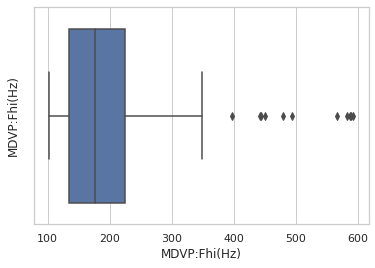

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


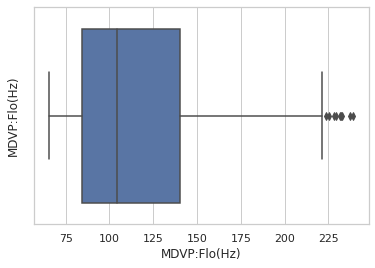

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


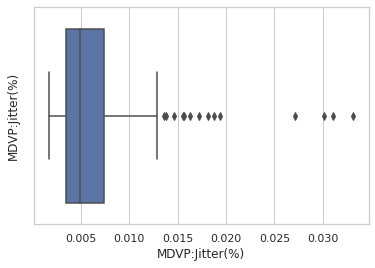

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


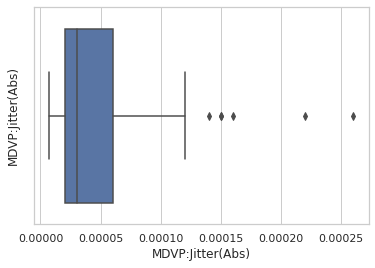

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


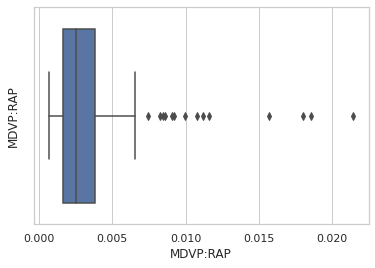

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


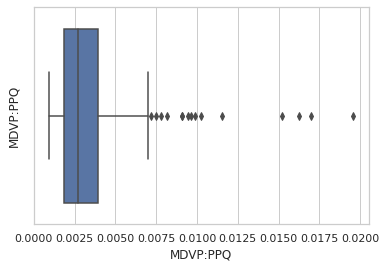

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


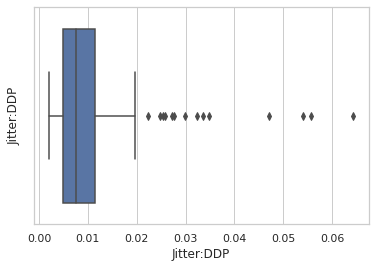

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


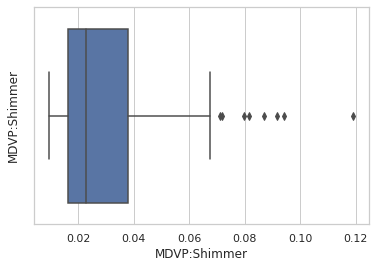

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


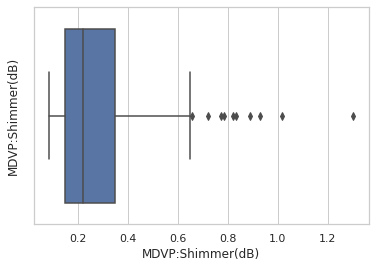

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


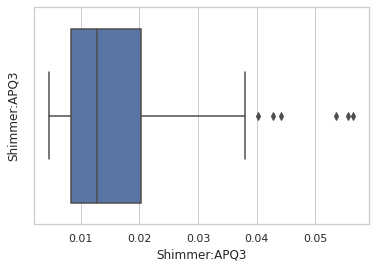

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


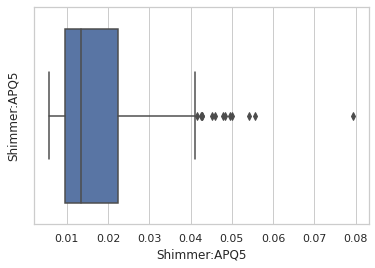

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


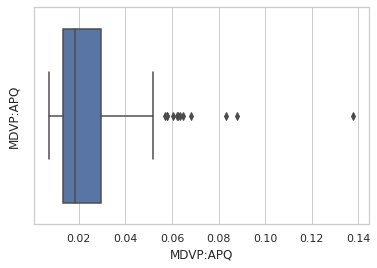

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


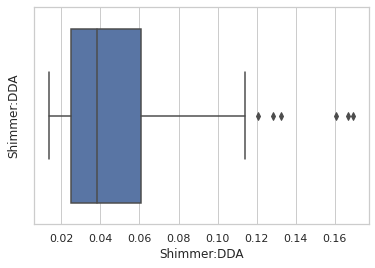

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


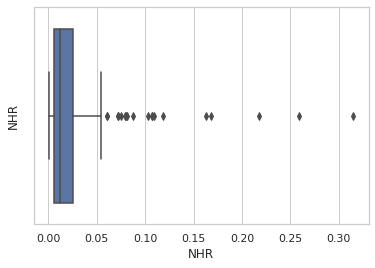

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


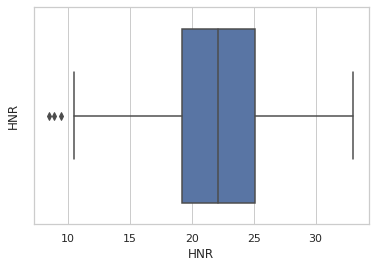

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


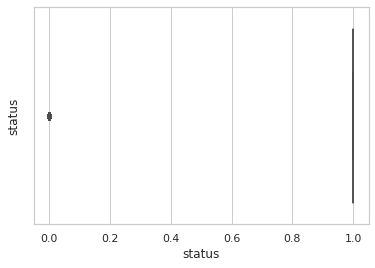

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


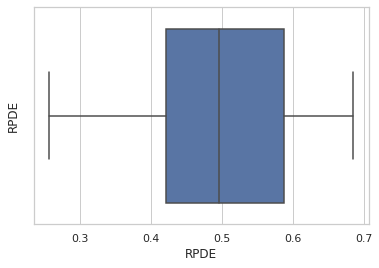

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


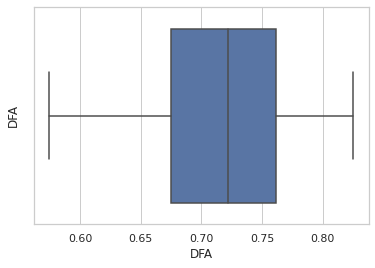

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


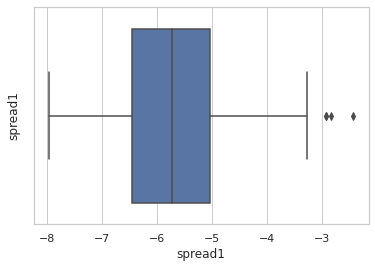

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


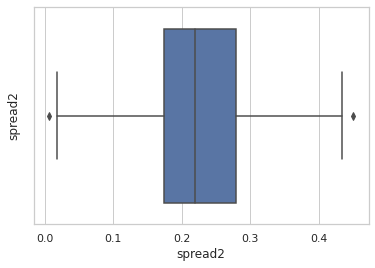

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


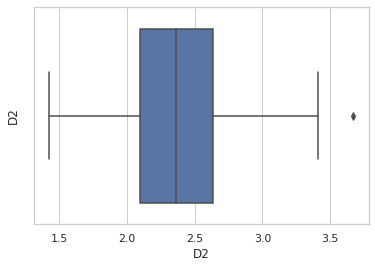

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


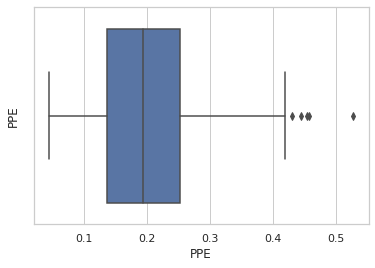

In [ ]:
for i in df.columns[1:]:
    sns.boxplot(df[i])
    plt.ylabel(i)
    plt.show()

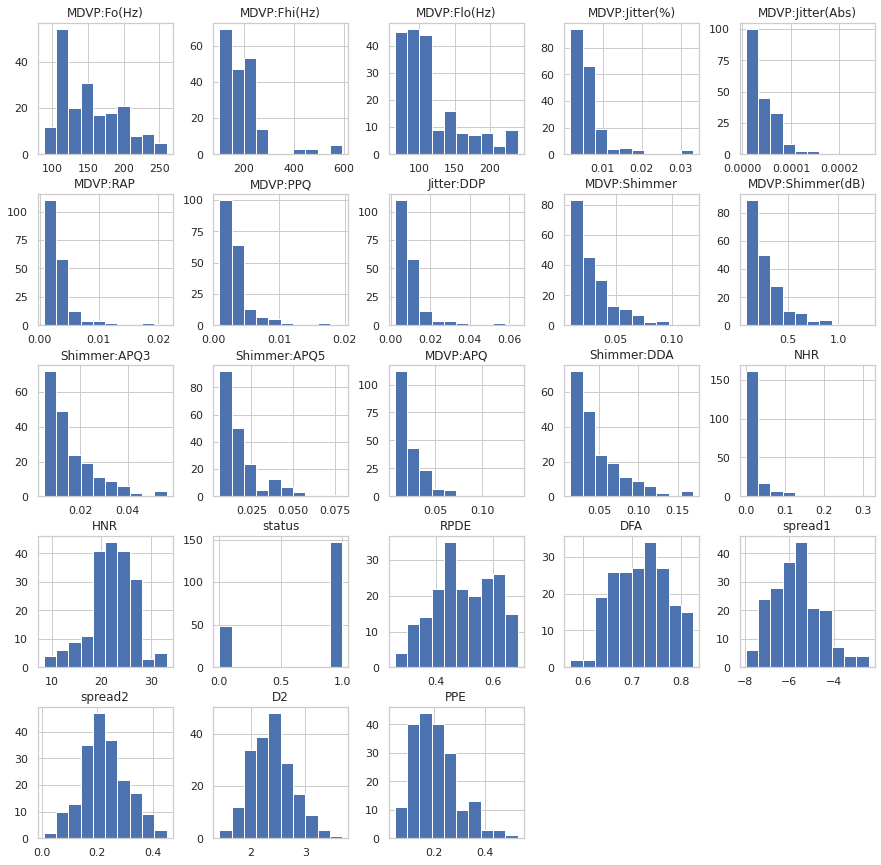

In [ ]:
df.hist(figsize=(15,15));

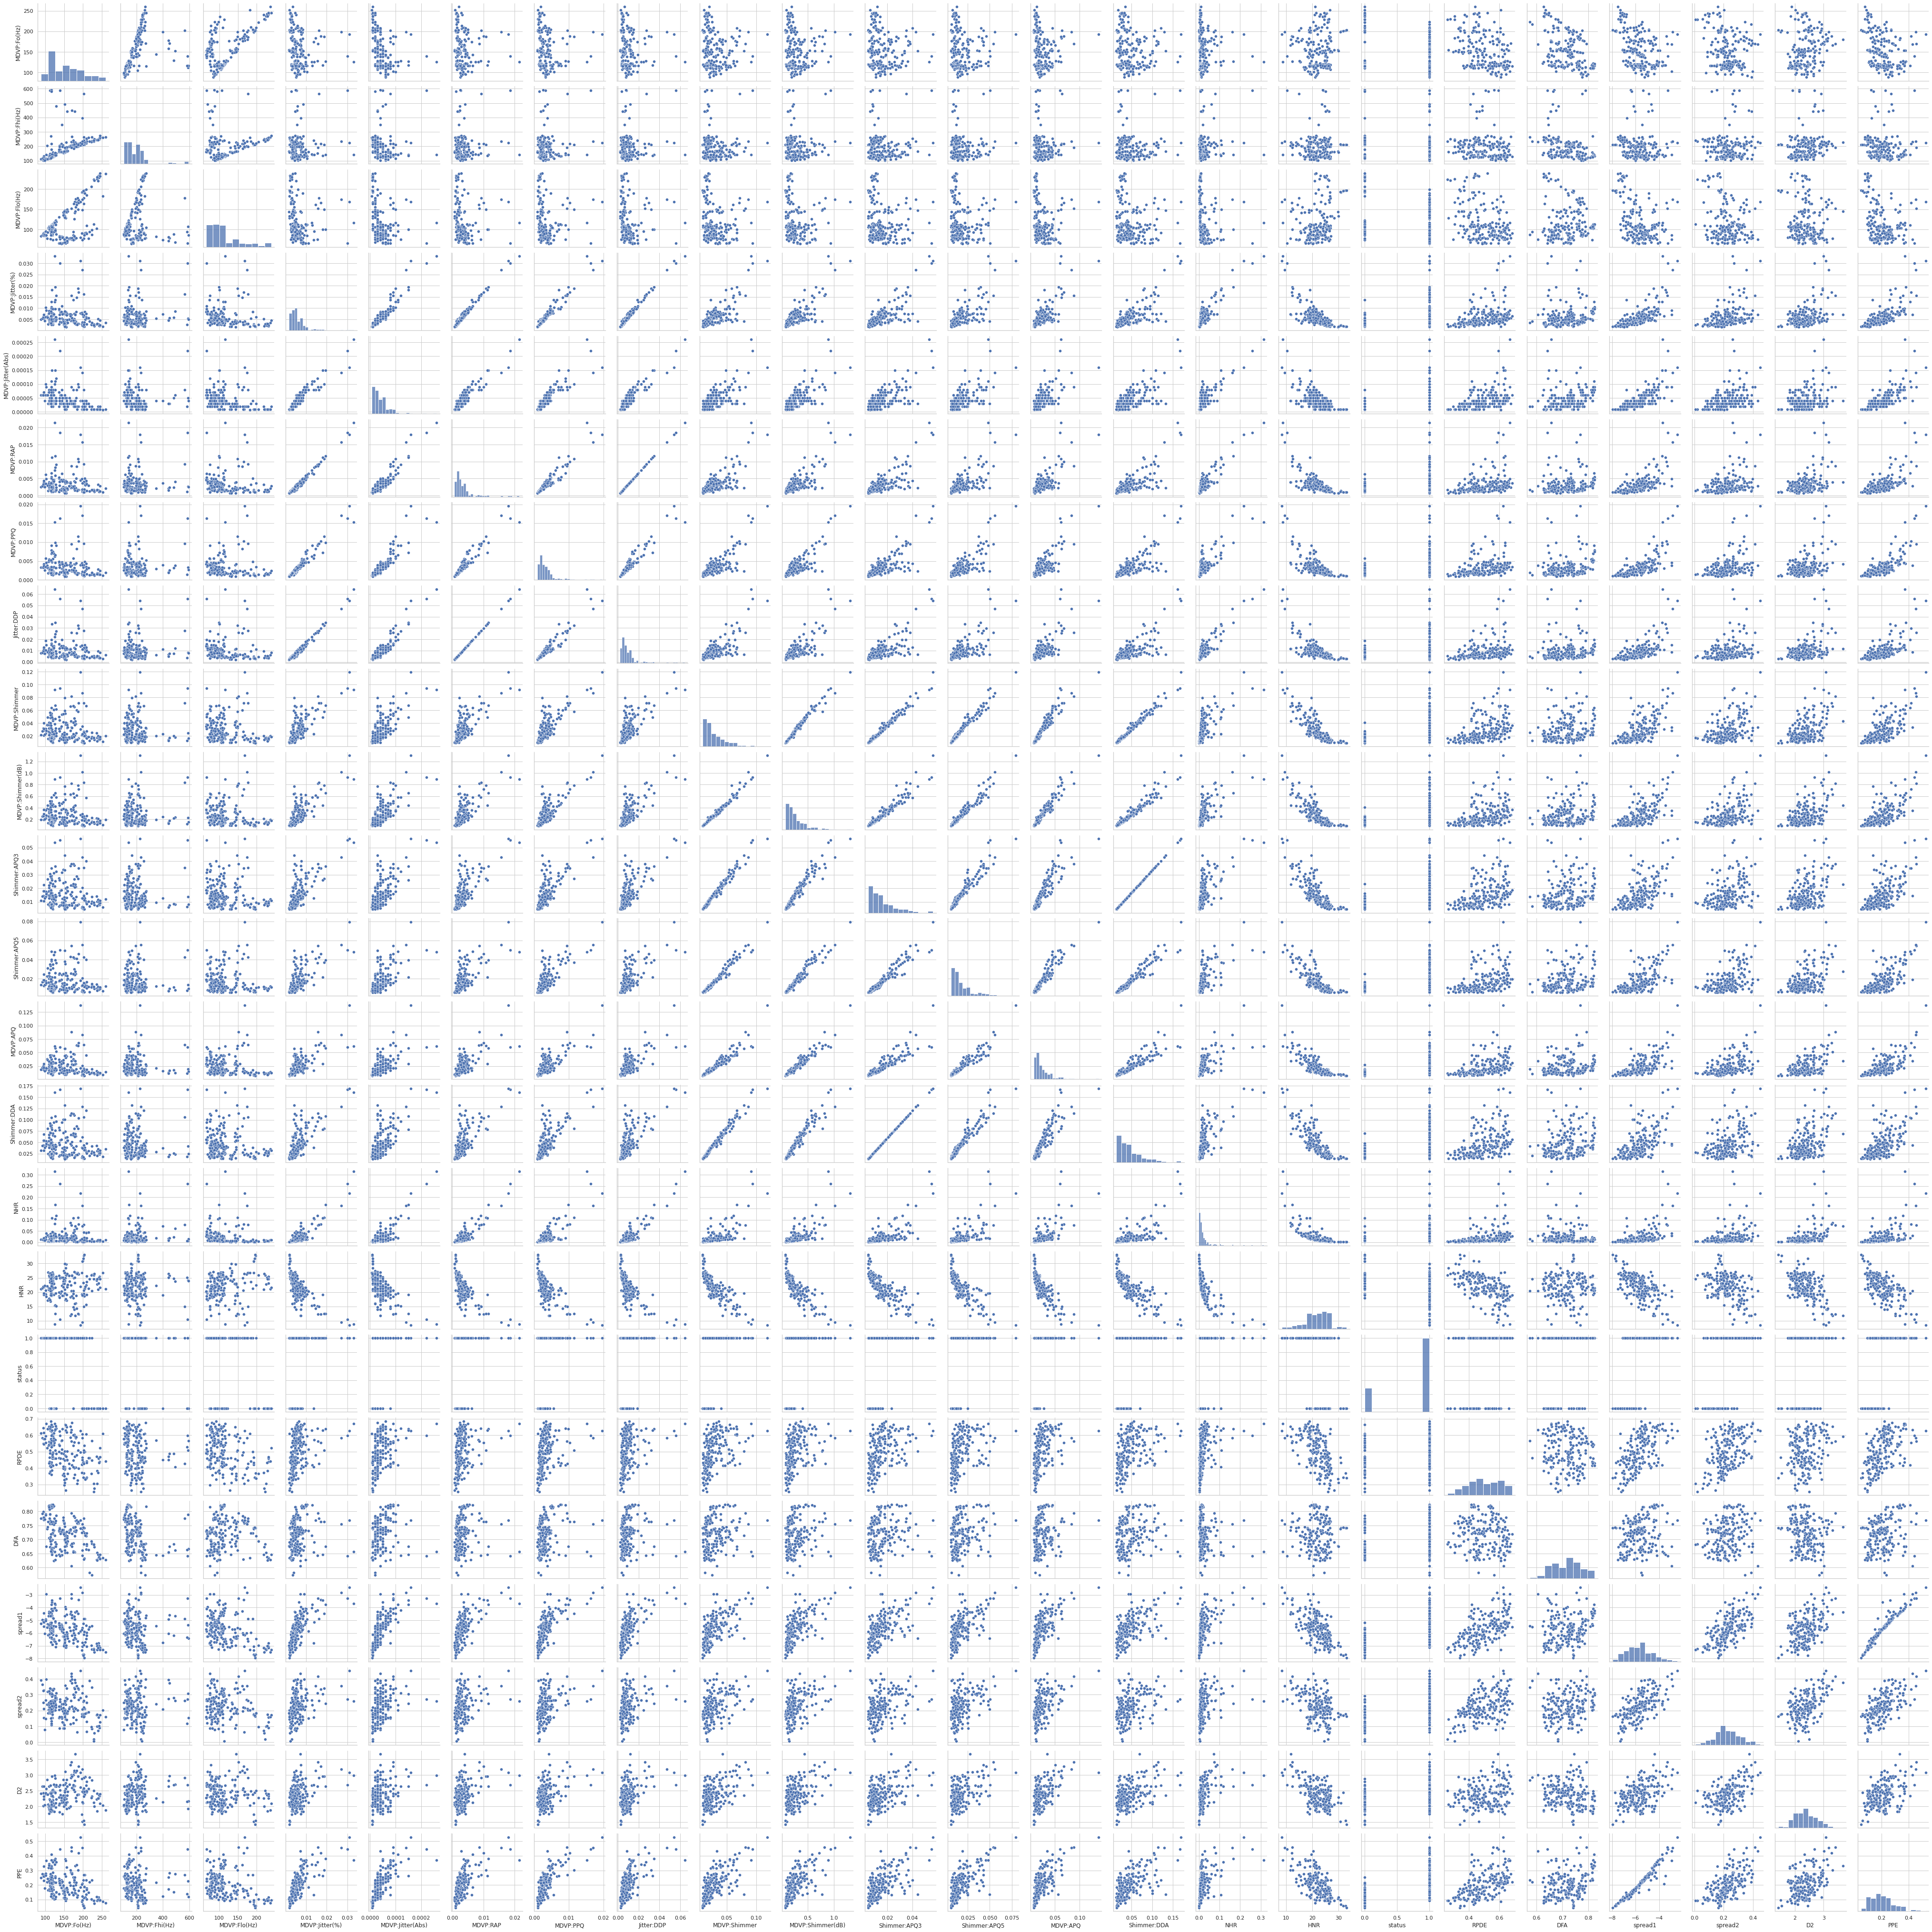

In [ ]:
sns.pairplot(df)

The next bar plot shows us the correlation between features and 'status'. The values that are negative have linear correlation with 'status'. The more positive a value the more it has a positive linear correlation with 'status'(1 being the highest with perfect positive linear correlation)

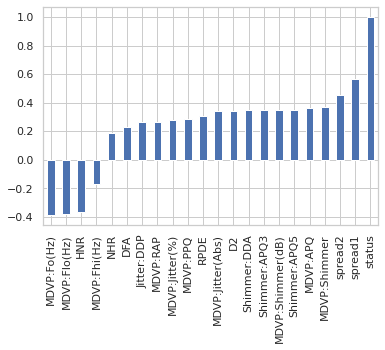

In [ ]:
df.corr()['status'][:-1].sort_values().plot(kind='bar')

We can see from the scatterplot below that Shimmer:DDA and MDVP:Shimmer have positive linear correlation which tallies with the heatmap value 0.99.

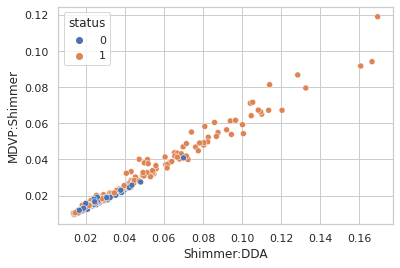

In [ ]:
sns.scatterplot(x = df['Shimmer:DDA'], y = df['MDVP:Shimmer'], hue = df['status'])

We can see from the scatterplot below that Shimmer:DDA and MDVP:Shimmer have negative linear correlation which tallies with the heatmap value -0.84.

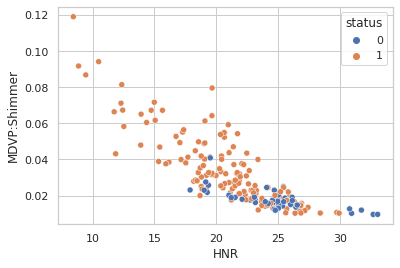

In [ ]:
sns.scatterplot(x = df['HNR'], y = df['MDVP:Shimmer'], hue = df['status'])

## XGBoost

In [ ]:
X = df.drop(['status'],axis=1)
Y = df['status']

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
#transform data
# fit_transform() method fits to the data and then transforms it
X = scaler.fit_transform(X)

In [ ]:
#  import train_test_split from sklearn. 
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets with 15% of testings
XGB_X_train, XGB_X_test, XGB_Y_train, XGB_Y_test=train_test_split(X, Y, test_size=0.15, random_state = 42)

In [ ]:
#Using XGBoost for the classification
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
# fitting the model
classifier = XGBClassifier()
classifier.fit(XGB_X_train, XGB_Y_train) # fit with x and y train

XGBClassifier()

In [ ]:
XGB_Y_prediction = classifier.predict(XGB_X_test)

In [ ]:
import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(XGB_Y_test, XGB_Y_prediction))

print("Precision:",metrics.precision_score(XGB_Y_test, XGB_Y_prediction))

print("Recall:",metrics.recall_score(XGB_Y_test, XGB_Y_prediction))

Accuracy: 0.9666666666666667
Precision: 0.9629629629629629
Recall: 1.0


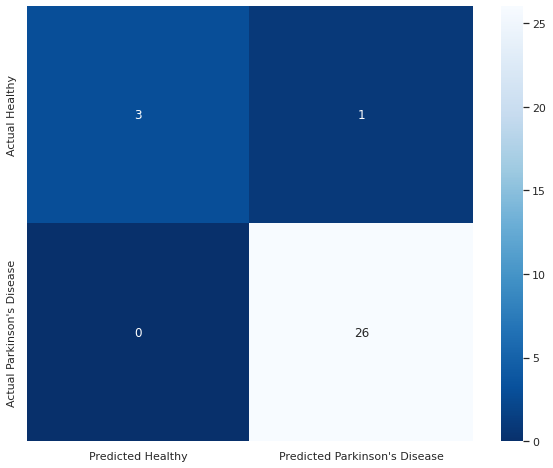

In [ ]:
cm = confusion_matrix(XGB_Y_test, XGB_Y_prediction)
x_axis_labels = ["Predicted Healthy", "Predicted Parkinson's Disease"] # labels for x-axis
y_axis_labels = ["Actual Healthy", "Actual Parkinson's Disease"] # labels for y-axis
plt.figure(figsize=(10,8))
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, cmap="Blues_r")

## Multinomial Naive Bayes

In [ ]:
X = df.drop(['status'],axis=1)
Y = df['status']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#transform data
# fit_transform() method fits to the data and then transforms it
X = scaler.fit_transform(X)

In [ ]:
#  import train_test_split from sklearn. 
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets with 15% of testings
MNB_X_train, MNB_X_test, MNB_Y_train, MNB_Y_test=train_test_split(X, Y, test_size=0.15, random_state = 42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
classifierMNB = MultinomialNB()
classifierMNB.fit(MNB_X_train, MNB_Y_train) 

MultinomialNB()

In [ ]:
MNB_Y_prediction = classifierMNB.predict(MNB_X_test)

In [ ]:
import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(MNB_Y_test, MNB_Y_prediction))

print("Precision:",metrics.precision_score(MNB_Y_test, MNB_Y_prediction))

print("Recall:",metrics.recall_score(MNB_Y_test, MNB_Y_prediction))

Accuracy: 0.9333333333333333
Precision: 0.9285714285714286
Recall: 1.0


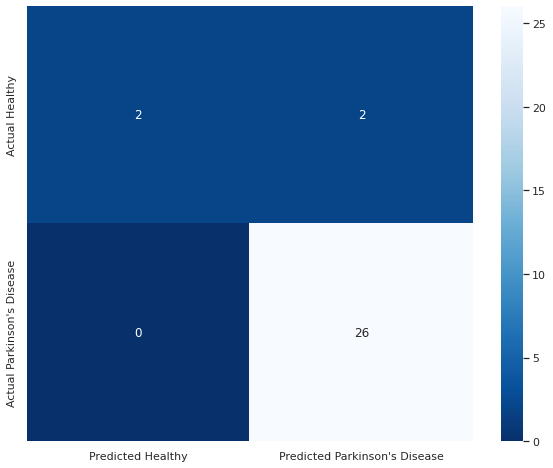

In [ ]:
cm = confusion_matrix(MNB_Y_test, MNB_Y_prediction)
x_axis_labels = ["Predicted Healthy", "Predicted Parkinson's Disease"] # labels for x-axis
y_axis_labels = ["Actual Healthy", "Actual Parkinson's Disease"] # labels for y-axis
plt.figure(figsize=(10,8))
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, cmap="Blues_r")

## Passive Aggressive Classifier

In [ ]:
X = df.drop(['status'],axis=1)
Y = df['status']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#transform data
# fit_transform() method fits to the data and then transforms it
X = scaler.fit_transform(X)

In [ ]:
#  import train_test_split from sklearn. 
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets with 15% of testings
PAC_X_train, PAC_X_test, PAC_Y_train, PAC_Y_test=train_test_split(X, Y, test_size=0.15, random_state = 42)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
classifierPAC = PassiveAggressiveClassifier(n_iter_no_change=50)
classifierPAC.fit(PAC_X_train, PAC_Y_train)

PassiveAggressiveClassifier(n_iter_no_change=50)

In [ ]:
PAC_Y_prediction = classifierPAC.predict(PAC_X_test)

In [ ]:
import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(PAC_Y_test, PAC_Y_prediction))

print("Precision:",metrics.precision_score(PAC_Y_test, PAC_Y_prediction))

print("Recall:",metrics.recall_score(PAC_Y_test, PAC_Y_prediction))

Accuracy: 0.9
Precision: 0.96
Recall: 0.9230769230769231


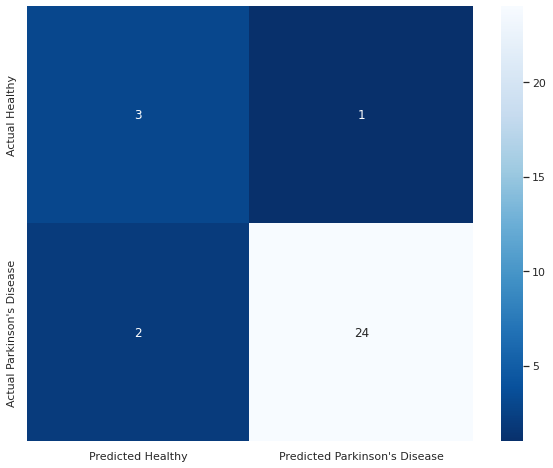

In [ ]:
cm = confusion_matrix(PAC_Y_test, PAC_Y_prediction)
x_axis_labels = ["Predicted Healthy", "Predicted Parkinson's Disease"] # labels for x-axis
y_axis_labels = ["Actual Healthy", "Actual Parkinson's Disease"] # labels for y-axis
plt.figure(figsize=(10,8))
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, cmap="Blues_r")

## Support Vector Classifier

In [ ]:
X = df.drop(['status'],axis=1)
Y = df['status']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#transform data
# fit_transform() method fits to the data and then transforms it
X = scaler.fit_transform(X)

In [ ]:
#  import train_test_split from sklearn. 
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets with 15% of testings
SVC_X_train, SVC_X_test, SVC_Y_train, SVC_Y_test=train_test_split(X, Y, test_size=0.15, random_state = 42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
svcModel = SVC(gamma="auto")
svcModel.fit(SVC_X_train, SVC_Y_train)

SVC(gamma='auto')

In [ ]:
SVC_Y_prediction = svcModel.predict(SVC_X_test)

In [ ]:
import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(SVC_Y_test, SVC_Y_prediction))

print("Precision:",metrics.precision_score(SVC_Y_test, SVC_Y_prediction))

print("Recall:",metrics.recall_score(SVC_Y_test, SVC_Y_prediction))

Accuracy: 0.9
Precision: 0.896551724137931
Recall: 1.0


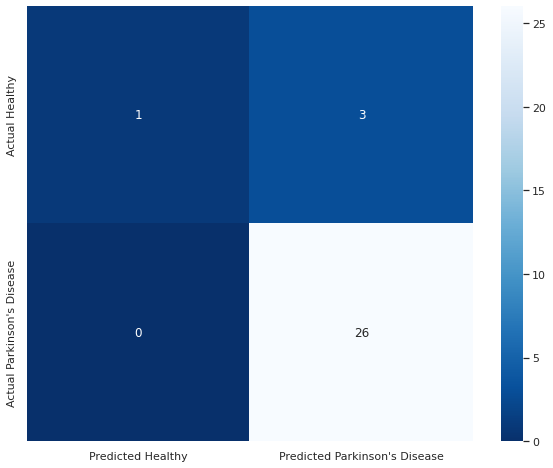

In [ ]:
cm = confusion_matrix(SVC_Y_test, SVC_Y_prediction)
x_axis_labels = ["Predicted Healthy", "Predicted Parkinson's Disease"] # labels for x-axis
y_axis_labels = ["Actual Healthy", "Actual Parkinson's Disease"] # labels for y-axis
plt.figure(figsize=(10,8))
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, cmap="Blues_r")

## Decision Tree

In [ ]:
X = df.drop(['status'],axis=1)
Y = df['status']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#transform data
# fit_transform() method fits to the data and then transforms it
X = scaler.fit_transform(X)

In [ ]:
#  import train_test_split from sklearn. 
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets with 15% of testings
DT_X_train, DT_X_test, DT_Y_train, DT_Y_test=train_test_split(X, Y, test_size=0.15, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(DT_X_train,DT_Y_train)

In [ ]:
DT_Y_prediction = clf.predict(DT_X_test)

In [ ]:
import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(DT_Y_test, DT_Y_prediction))

print("Precision:",metrics.precision_score(DT_Y_test, DT_Y_prediction))

print("Recall:",metrics.recall_score(DT_Y_test, DT_Y_prediction))

Accuracy: 0.9333333333333333
Precision: 0.9615384615384616
Recall: 0.9615384615384616


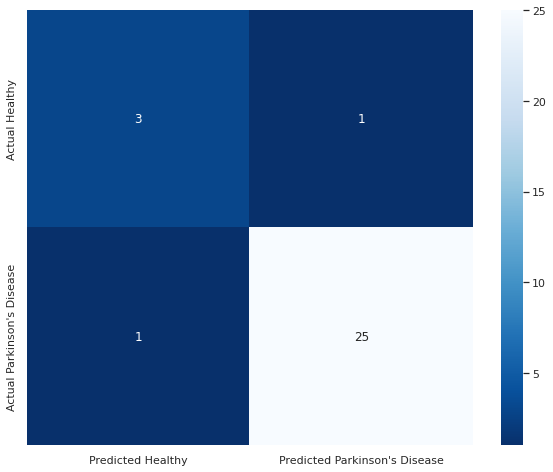

In [ ]:
cm = confusion_matrix(DT_Y_test, DT_Y_prediction)
x_axis_labels = ["Predicted Healthy", "Predicted Parkinson's Disease"] # labels for x-axis
y_axis_labels = ["Actual Healthy", "Actual Parkinson's Disease"] # labels for y-axis
plt.figure(figsize=(10,8))
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, cmap="Blues_r")

## Comparison of Models

In [ ]:
modelname = []
modelname.append("XGB")
modelname.append("MNB")
modelname.append("PAC")
modelname.append("SVC")
modelname.append("DT")

In [ ]:
accr = []
accr.append(metrics.accuracy_score(XGB_Y_test, XGB_Y_prediction)*100)
accr.append(metrics.accuracy_score(MNB_Y_test, MNB_Y_prediction)*100)
accr.append(metrics.accuracy_score(PAC_Y_test, PAC_Y_prediction)*100)
accr.append(metrics.accuracy_score(SVC_Y_test, SVC_Y_prediction)*100)
accr.append(metrics.accuracy_score(DT_Y_test, DT_Y_prediction)*100)

<BarContainer object of 5 artists>

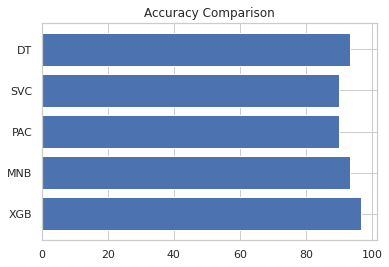

In [ ]:
plt.title("Accuracy Comparison")
plt.barh(modelname, accr)

In [ ]:
prc = []
prc.append(metrics.precision_score(XGB_Y_test, XGB_Y_prediction)*100)
prc.append(metrics.precision_score(MNB_Y_test, MNB_Y_prediction)*100)
prc.append(metrics.precision_score(PAC_Y_test, PAC_Y_prediction)*100)
prc.append(metrics.precision_score(SVC_Y_test, SVC_Y_prediction)*100)
prc.append(metrics.precision_score(DT_Y_test, DT_Y_prediction)*100)

<BarContainer object of 5 artists>

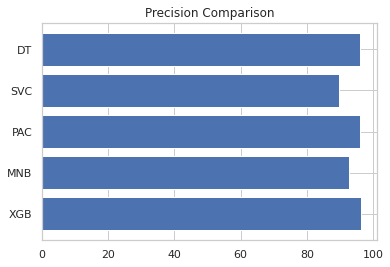

In [ ]:
plt.title("Precision Comparison")
plt.barh(modelname, prc)

In [ ]:
rec = []
rec.append(metrics.recall_score(XGB_Y_test, XGB_Y_prediction)*100)
rec.append(metrics.recall_score(MNB_Y_test, MNB_Y_prediction)*100)
rec.append(metrics.recall_score(PAC_Y_test, PAC_Y_prediction)*100)
rec.append(metrics.recall_score(SVC_Y_test, SVC_Y_prediction)*100)
rec.append(metrics.recall_score(DT_Y_test, DT_Y_prediction)*100)

<BarContainer object of 5 artists>

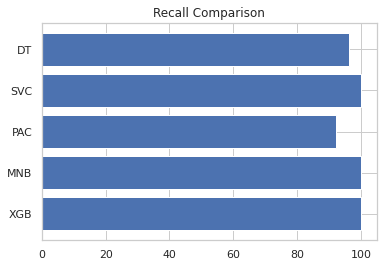

In [ ]:
plt.title("Recall Comparison")
plt.barh(modelname, rec)